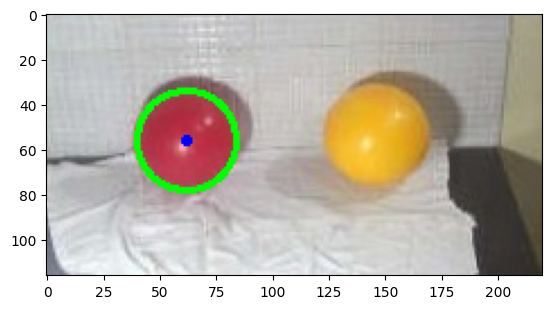

In [ ]:
#Natália Sens Weise e Matheus Petters Bevilaqua
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('bolas.jpg')

# convertendo pra hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# kernel de 4,4 pega círculos mais precisos
# pra identificar os círculos mais facilmente, tem que borrar a imagem
blur = cv2.blur(hsv, (4, 4))

#aplicando o blur antes de tratar a cor fica mais simples

#IDENTIFICANDO COR
# limiares baixo e alto pra cor vermelha
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])

lower2 = np.array([160,100,20])
upper2 = np.array([179,255,255])

# achar a cor dentro dos limiares (mascara)
lower_mask = cv2.inRange(blur, lower1, upper1)
upper_mask = cv2.inRange(blur, lower2, upper2)
# criando mascara
full_mask = lower_mask + upper_mask;

# cor separada
newimg = cv2.bitwise_and(blur, blur, mask=full_mask)

# fechando o circulo
kernel = np.ones((3,3),np.uint8)
close = cv2.morphologyEx(newimg, cv2.MORPH_CLOSE, kernel)

# micro tratamento
bgr = cv2.cvtColor(close, cv2.COLOR_HSV2BGR)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# IDENTIFICANDO CIRCULOS
# param1 tem q ser maior q o param2
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 7, param1 = 30,
               param2 = 15, minRadius = 1, maxRadius = 25)
# o problema todo era o param 2,

if circles is not None:

    # vai converter as posições em valores inteiros
    found = np.uint16(np.around(circles))

    for pnt in found[0, :]:
        x, y, r = pnt[0], pnt[1], pnt[2]
        # desenha a circunferência
        # x, y são coordenadas e r o raio
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)

        # desenha um ponto no centro da circunferência
        cv2.circle(img, (x, y), 1, (255, 0, 0), 2)

final = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(final)
